In [1]:
### FOR GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive/')
# %ls

# %ls
%cd drive/MyDrive/cs7643_fp
%ls

Mounted at /content/drive/
/content/drive/MyDrive/cs7643_fp
cocoScripts/                     livecell_config.yaml  segmentation_results/
data/                            make_dataset.py       transformer/
detectron2-ResNeSt/              maskrcnn/             wandb/
instructions.md                  nn_results/
LIVECell_anchor_based_model.pth  README.md


In [3]:
#### NECESSARY PACKAGES
!pip install git+https://github.com/facebookresearch/segment-anything.git
!python -m pip install -e detectron2-ResNeSt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-u_y75gsb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-u_y75gsb
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=9908f6c30bae9ed694997b1016353497d00797191a1a25268e62e031e2aa9ba4
  Stored in directory: /tmp/pip-ephem-wheel-cache-gn5vqwup/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/cs7643_fp/detectron2-ResNeSt
  Pre

In [4]:
from pycocotools import mask as maskUtils
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

import numpy as np

In [6]:
import json

with open('data/testImgs.json') as f:
    data = json.load(f)

In [14]:
file_id = {}
for idx, field in enumerate(data["images"]):
  file_name = field['original_filename'] 
  parts = file_name.split("_")
  if parts[0] not in file_id:
    file_id[parts[0]] = []
  file_id[parts[0]].append(field['id'])
  # if (idx == 3): break

print(file_id)

{'BT474': [101438, 101798, 101943, 102143, 102490, 102610, 102901, 103164, 103336, 103564, 103726, 103849, 103985, 104166, 104380, 104590, 104775, 105061, 105281, 105426, 105674, 106124, 106276, 106460, 106594, 106830, 106979, 107161, 107408, 107665, 107881, 108005, 108254, 108410, 108549, 108718, 108910, 109140, 109335, 109563, 109766, 109972, 110145, 110337, 110524, 110723, 110920, 111014, 111162, 111306, 111524, 111797, 111919, 112047, 112250, 112547, 112729, 112938, 113207, 113379, 113659, 113812, 114070, 114201, 114321, 114739, 114879, 114994, 115222, 115351, 115537, 115683, 115849, 116020, 116171, 116474, 116668, 117083, 117268, 117419, 117581, 117718, 117905, 118116, 118337, 118466, 118684, 118860, 118961, 119171, 119382, 119560, 119729, 120037, 120319, 120674, 120898, 121082, 121246, 121445, 121611, 121797, 122057, 122180, 122346, 122575, 122804, 123012, 123195, 123386, 123520, 123745, 123910, 124098, 124246, 124389, 124552, 124675, 124860, 125288, 125524, 125776, 125893, 12604

In [15]:
coco_gt = COCO('data/testImgs.json')
coco_results = COCO('segmentation_results/SAM/SAM_autoMaskGenerator.json')

loading annotations into memory...
Done (t=11.42s)
creating index...
index created!
loading annotations into memory...
Done (t=4.19s)
creating index...
index created!


In [43]:

# Initialize COCO evaluation object for instance segmentation
coco_eval = COCOeval(coco_gt, coco_results, 'segm')

for cellType, ids in file_id.items():
  # Calculate IoU for each image and each object instance and run evaluation metrics
  coco_eval_2 = COCOeval(coco_gt, coco_results, 'segm')
  coco_eval_2.params.imgIds = ids
  coco_eval_2.evaluate()
  coco_eval_2.accumulate()
  coco_eval_2.summarize()

  print("Cell Type Being Evaluated On: ", cellType)
  coco_eval.params.imgIds = ids
  coco_eval.evaluate()
  coco_eval.accumulate()
  # coco_eval.summarize()

  # idx = coco_eval.params.catIds.index(1)  # index of the category you're interested in (here 1 = 'person')
  # recalls = coco_eval.eval['recall'][idx, :, :, 0]  # recall values for the specified category and image ID
  
  # # Print the recall values for the current image ID
  # # print(recalls)
  # # for i, recall in enumerate(recalls):
  # #     print('Recall@{} for image: {:.3f}'.format(i + 1, recall))

  # preicisions = coco_eval.eval['precision'][idx, :, :, 0]  # recall values for the specified category and image ID
  # print(preicisions)
  # # Print the recall values for the current image ID
  # for i, prec in enumerate(preicisions):
  #     print('Recall@{} for image: {:.3f}'.format(i + 1, prec))

coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=82.42s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.082
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.048
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.015
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.012
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.103
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1

In [35]:
# for cellType, ids in file_id.items():
  # catids = 
  # idx = coco_eval.params.catIds.index(1)
  # print(coco_eval.params.catIds.index(1))
# print((coco_eval.eval))
print(coco_eval.eval['precision'].shape)
print(coco_eval.eval['recall'].shape)
total = 0
for c, l in file_id.items():
  total += len(l)
  # print(coco_eval.eval['precision'][idx, :, :, 0])
print(total)

(10, 101, 1, 4, 3)
(10, 1, 4, 3)
1564


In [ ]:
coco_eval.eval['precision']#Calculate average IoU
mean_iou = 0
#Loop over all images
for v in coco_eval.ious.values():
    #Grab IoU for each predicted object and calculate the mean
    mean_iou += np.mean(np.max(v, axis=0))

#mean over all images   
mean_iou /= len(coco_eval.ious)

print("Average IoU:", mean_iou)

Average IoU: 0.24687587347138373


In [ ]:
print('AP: {:.3f}'.format(coco_eval.stats[0]))

AP: 0.038


In [ ]:
# print(coco_eval.evalImgs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
print(coco_eval.stats)

[ 4.90188241e-03  8.35958581e-03  4.95049505e-03  5.09610769e-03
  1.65180673e-04 -1.00000000e+00  5.02710954e-04  3.51766068e-03
  1.22414065e-02  1.21963148e-02  2.24550898e-02 -1.00000000e+00]


In [68]:
# manual input
results = {"BT474": {"precision": 0.043, "recall": 0.103}, "A172": {"precision": 0.030, "recall": 0.087}, "MCF7": {"precision": 0.012, "recall": 0.021}, "Huh7": {"precision": 0.083, "recall": 0.201}, 
           "BV2": {"precision": 0.058, "recall": 0.074}, "SkBr3": {"precision": 0.139, "recall": 0.165}, "SKOV3": {"precision": 0.019, "recall": 0.072}, "SHSY5Y": {"precision": 0.005, "recall": 0.012}}

In [69]:
x_labels = []
precision_labels = []
afnr_labels = []

for cell, d in results.items():
  print(d)
  x_labels.append(cell)
  precision_labels.append(d["precision"]*100)
  afnr_labels.append((1-d["recall"])*100)

x_labels = sorted(x_labels)
precision_labels = [p for _, p in sorted(zip(x_labels, precision_labels))]
afnr_labels = [p for _, p in sorted(zip(x_labels, afnr_labels))]

{'precision': 0.043, 'recall': 0.103}
{'precision': 0.03, 'recall': 0.087}
{'precision': 0.012, 'recall': 0.021}
{'precision': 0.083, 'recall': 0.201}
{'precision': 0.058, 'recall': 0.074}
{'precision': 0.139, 'recall': 0.165}
{'precision': 0.019, 'recall': 0.072}
{'precision': 0.005, 'recall': 0.012}


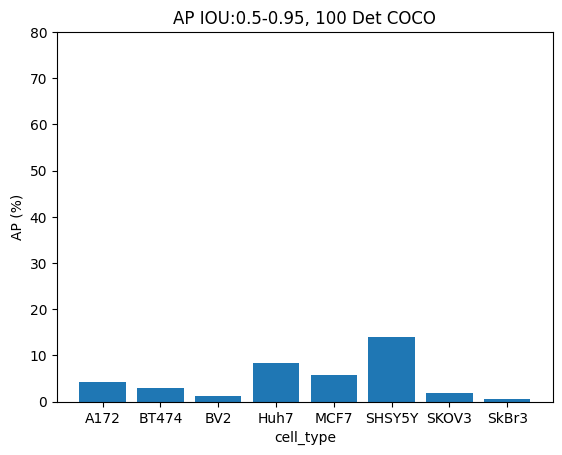

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.bar(x_labels,precision_labels)
plt.xlabel("cell_type")
plt.ylabel("AP (%)")
plt.title("AP IOU:0.5-0.95, 100 Det COCO")
plt.ylim(0, 80)
plt.show()


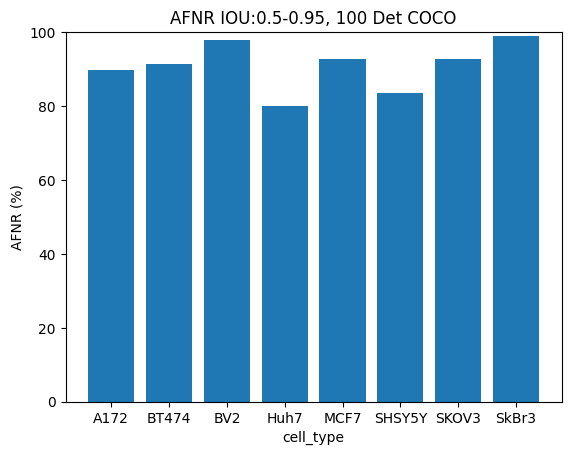

In [71]:
fig = plt.figure()

plt.bar(x_labels,afnr_labels)
plt.xlabel("cell_type")
plt.ylabel("AFNR (%)")
plt.title("AFNR IOU:0.5-0.95, 100 Det COCO")
plt.ylim(0, 100)
plt.show()